<a href="https://colab.research.google.com/github/Bandarupallipavani/Machine-Learning-Projects/blob/main/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('height_weight_data2.csv')

In [ ]:
df.head()

,Height (cm),Weight (kg)
0,152,48
1,160,52
2,168,55
3,157,60
4,175,65


Text(0, 0.5, 'Height')

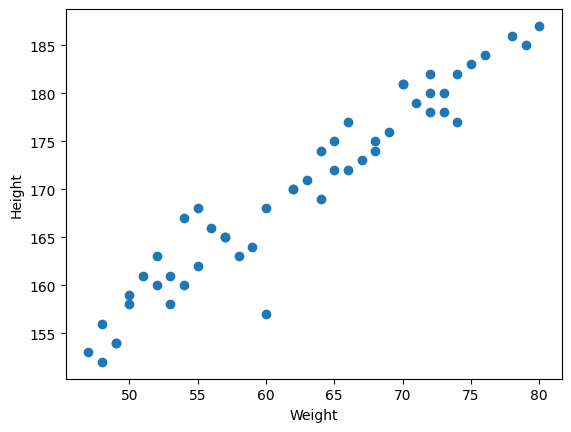

In [ ]:
plt.scatter(df['Weight (kg)'],df['Height (cm)'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
##Finding correlation
df.corr()

,Height (cm),Weight (kg)
Height (cm),1.000000,0.963188
Weight (kg),0.963188,1.000000


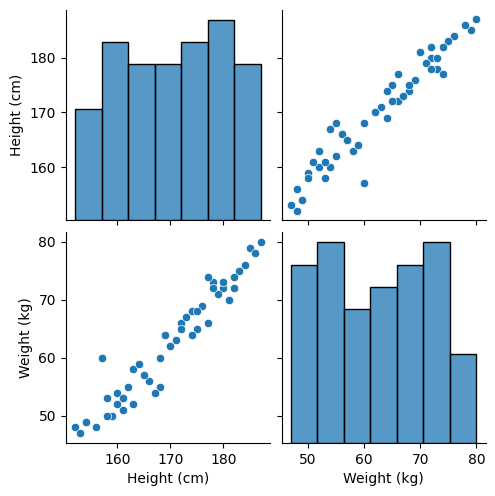

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
##Dividing independent and dependend features
X = df[['Weight (kg)']]
y = df['Height (cm)']#dependent variable
type(y)


pandas.core.series.Series

In [ ]:
#Train Test split
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
##Standization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.32096742],
       [-1.34696585],
       [-1.45121168],
       [-0.61724504],
       [ 1.15493406],
       [ 0.84219657],
       [ 0.11247576],
       [ 1.25917989],
       [-0.30450755],
       [-1.55545751],
       [-0.0960159 ],
       [-0.92998253],
       [ 0.11247576]])

In [ ]:
##Applying Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression(n_jobs=-1)

In [ ]:
regression.fit(X, y)

LinearRegression(n_jobs=-1)

In [ ]:
print("Slope value:", regression.coef_)
print("Intercept value:",regression.intercept_)

Slope value: [0.99573163]
Intercept value: 107.71754439020175


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


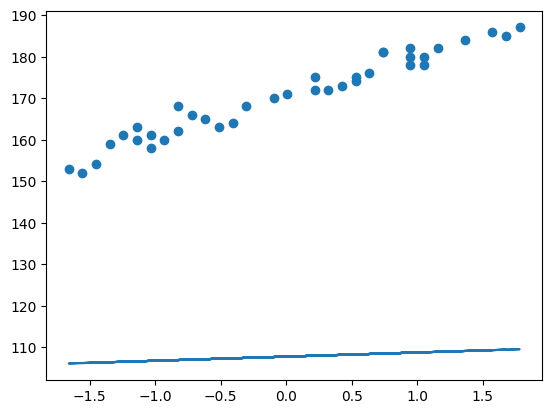

In [ ]:
#Ploting Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train))

In [ ]:
##Prediction for the test data
y_prediction = regression.predict(X_test)

In [ ]:
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
rmse = np.sqrt(mse)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)

MSE: 14.953811756414314
MAE: 2.627252734020647
RMSE: 3.8670158722733885


R Square
Formula
R^2 = 1-SSR/SST


In [ ]:
from sklearn.metrics import r2_score


In [ ]:
score = r2_score(y_test,y_prediction)
print(score)

0.8263812732320679


Adjusted R2 = 1- [(1-R2)*(n-1)/(n-k-1]
where: R2:The r2 of the model
n=The number of observations k:The number of predictor variables


In [ ]:
1- (1-score)*(len(y_test-1)/(len(y_test)-X_test.shape[1]-1))

0.7948142320015348

In [ ]:
##OLS Linear Regression
import statsmodels.api as sm

In [ ]:
model=sm.OLS(y_train,X_train).fit()

In [ ]:
prediction = model.predict(X_test)
print(prediction)

[  3.08928182 -12.96442198 -13.96777847  -5.94092657  11.11613372
   8.10606425   1.08256884  12.11949021  -2.93085711 -14.97113496
  -0.92414413  -8.95099603   1.08256884]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Height (cm)   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.024
Method:                 Least Squares   F-statistic:                             0.1179
Date:                Mon, 07 Apr 2025   Prob (F-statistic):                       0.733
Time:                        05:40:32   Log-Likelihood:                         -249.19
No. Observations:                  38   AIC:                                      500.4
Df Residuals:                      37   BIC:                                      502.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
##Prediction for new data
regression.predict(scaler.transform([[61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([168.57249938])